In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image

from IPython.display import Image as IPythonImage, display

In [2]:
R=4
ITER_NUM=200

In [3]:
def get_color(ratio1, ratio2, ratio3):
    def color(z, i):
        if abs(z) < R:
            return 0, 0, 0
        v = np.log2(i + R - np.log2(np.log2(abs(z)))) / 4
        if v < 1.0:
            return v**4, v**2.5, v ** 1
        else:
            v = max(0, 2 - v)
            return v**ratio1, v**ratio2, v**ratio3
    return color


def gen_mandelbrot(Z, ratio1, ratio2, ratio3):
    xs = tf.constant(Z.astype(np.complex64))
    zs = tf.Variable(xs)
    ns = tf.Variable(tf.zeros_like(xs, tf.float32))
    with tf.Session():
        tf.global_variables_initializer().run()
        zs_ = tf.where(tf.abs(zs) < R, zs**2 + xs, zs)
        not_diverged = tf.abs(zs_) < R
        step = tf.group(
            zs.assign(zs_),
            ns.assign_add(tf.cast(not_diverged, tf.float32))
        )

        for i in range(ITER_NUM):
            step.run()
        final_step = ns.eval()
        final_z = zs_.eval()
    r, g, b = np.frompyfunc(get_color(ratio1, ratio2, ratio3), 2, 3)(final_z, final_step)
    img_array = np.dstack((r, g, b))
    return Image.fromarray(np.uint8(img_array * 255))

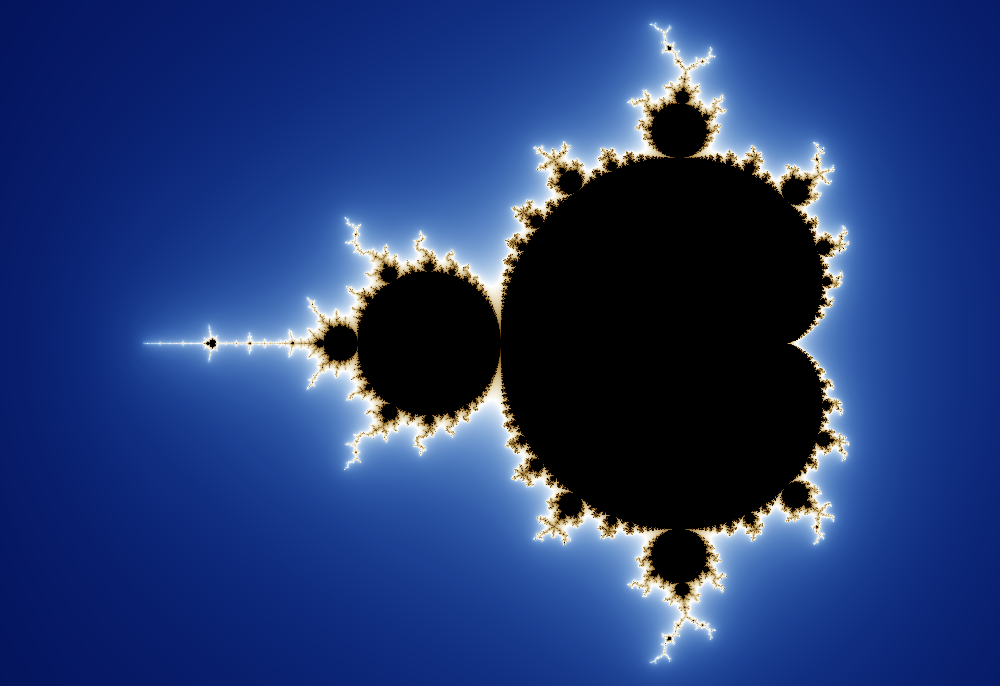

In [4]:
start_x = -2.5  # x range
end_x = 1
start_y = -1.2  # y rangea
end_y = 1.2
width = 1000

step = (end_x - start_x) / width
Y, X = np.mgrid[start_y:end_y:step, start_x:end_x:step]
Z = X + 1j * Y
img = gen_mandelbrot(Z, 1, 1.5, 3)
img.save('mandelbrot1.png')
display(img)

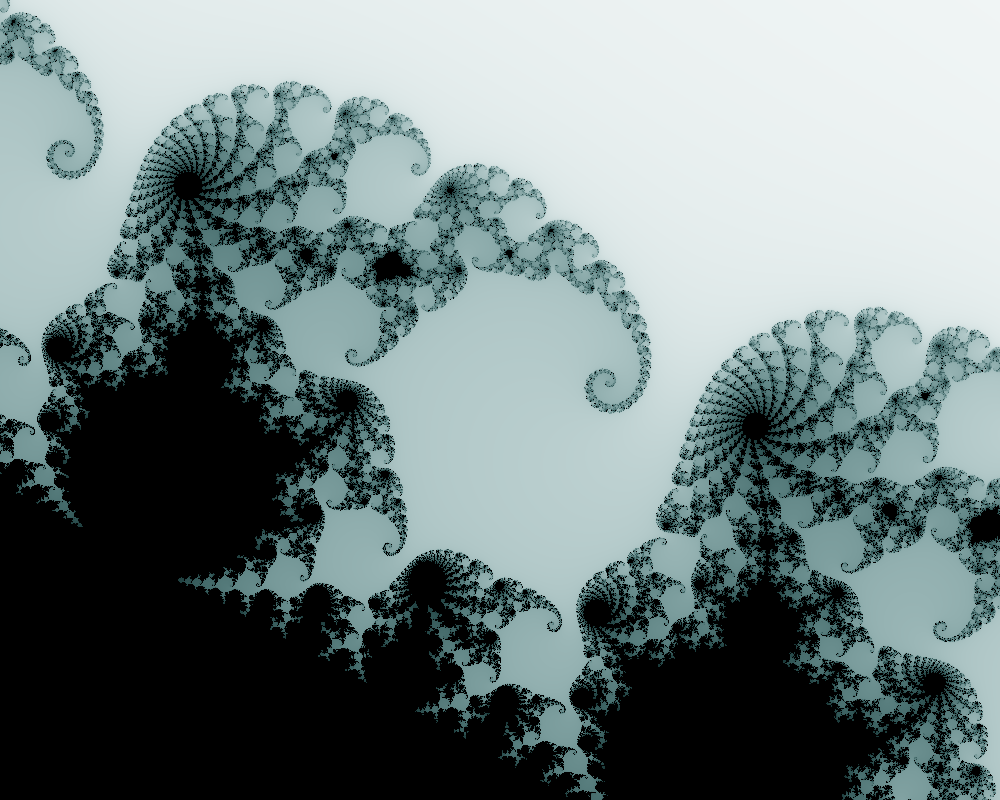

In [5]:
# Elephant Valley
start_x = 0.275  # x range
end_x = 0.28
start_y = 0.006  # y range
end_y = 0.01
width = 1000

step = (end_x - start_x) / width
Y, X = np.mgrid[start_y:end_y:step, start_x:end_x:step]
Z = X + 1j * Y
img = gen_mandelbrot(Z, 0.9, 0.6, 0.6)
img.save('mandelbrot2.png')
display(img)

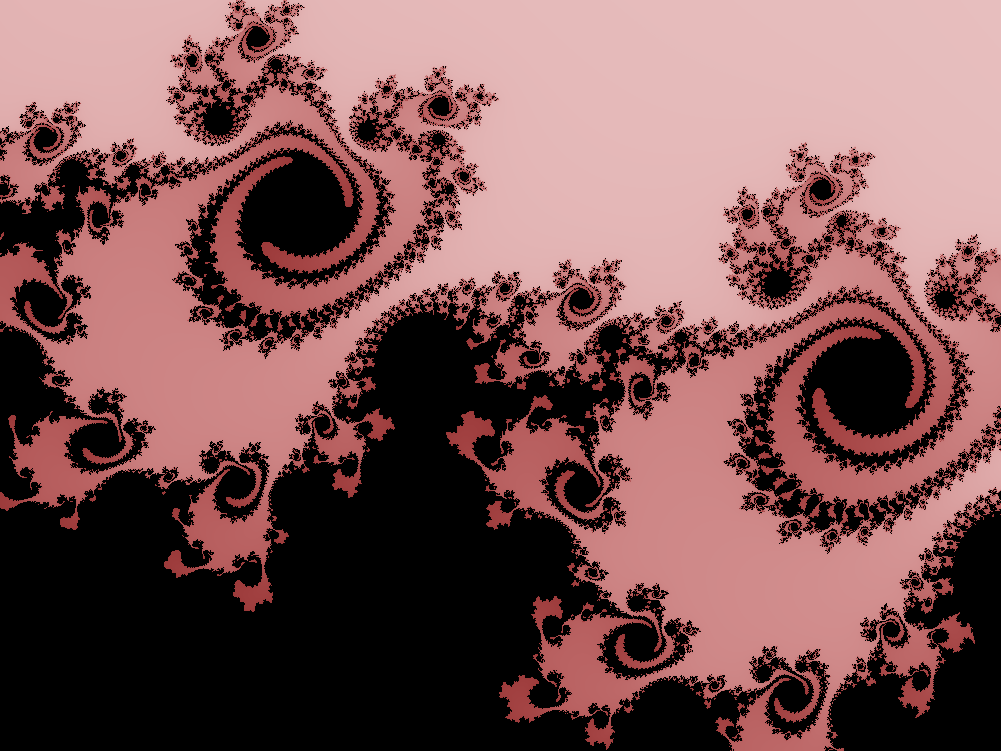

In [6]:
start_x = -0.090  # x range
end_x = -0.086
start_y = 0.654  # y range
end_y = 0.657
width = 1000
ratio1, ratio2, ratio3 = 0.2, 0.6, 0.6

step = (end_x - start_x) / width
Y, X = np.mgrid[start_y:end_y:step, start_x:end_x:step]
Z = X + 1j * Y
img = gen_mandelbrot(Z, ratio1, ratio2, ratio3)
img.save('mandelbrot3.png')
display(img)

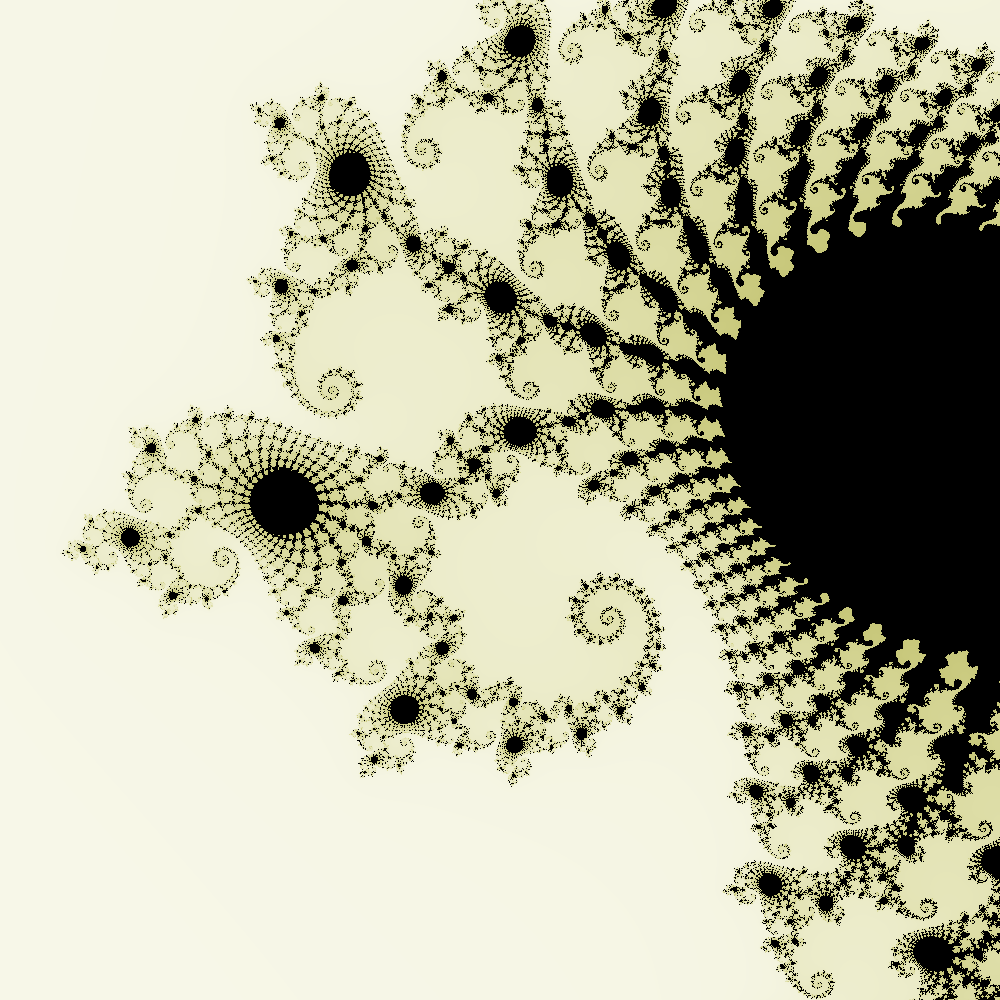

In [7]:
start_x = -0.750  # x range
end_x = -0.747
start_y = 0.099  # y range
end_y = 0.102
width = 1000

step = (end_x - start_x) / width
Y, X = np.mgrid[start_y:end_y:step, start_x:end_x:step]
Z = X + 1j * Y
img = gen_mandelbrot(Z, 0.1, 0.1, 0.3)
img.save('mandelbrot4.png')
display(img)